In [1]:
import pandas as pd
import numpy as np

In [16]:
reviews_df = pd.read_csv('googlereviews.csv')
#remove duplex index
reviews_df = reviews_df[reviews_df.columns[1:]]

In [17]:
#only load Android apps because reviews are all from Play Store
google_df = pd.read_csv('google.csv')
#remove duplex index column
google_df = google_df[google_df.columns[1:]]
google_df.head()

,app,rating,rating_count,size,installs,type,price,content,category
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,Free,0.0,4+,Lifestyle
1,Coloring book moana,3.9,967,14.0,500000,Free,0.0,4+,Lifestyle
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000,Free,0.0,4+,Lifestyle
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000,Free,0.0,12+,Lifestyle
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,Free,0.0,4+,Lifestyle


In [18]:
google_df.groupby('category').size()

category
Books & Reference     223
Business              263
Education             168
Entertainment        1774
Finance               302
Food & Drink           94
Games                 985
Health & Fitness      244
Lifestyle             424
Medical               290
Navigation            118
News                  204
Photo & Video         453
Productivity          346
Shopping              180
Social Networking     593
Sports                260
Travel                187
Utilities            1016
Weather                72
dtype: int64

<h3><span style='color:orange'>I wonder if there's an easier way to do the lists?</span>

In [19]:
#Create list of app names for each category

book_ref = list(google_df[google_df['category'] == 'Books & Reference']['app'])
business = list(google_df[google_df['category'] == 'Business']['app'])
edu = list(google_df[google_df['category'] == 'Education']['app'])
entertainment = list(google_df[google_df['category'] == 'Entertainment']['app'])
finance = list(google_df[google_df['category'] == 'Finance']['app'])
food_drink = list(google_df[google_df['category'] == 'Food & Drink']['app'])
games = list(google_df[google_df['category'] == 'Games']['app'])
health_fit = list(google_df[google_df['category'] == 'Health & Fitness']['app'])
lifestyle = list(google_df[google_df['category'] == 'Lifestyle']['app'])
medical = list(google_df[google_df['category'] == 'Medical']['app'])
navigation = list(google_df[google_df['category'] == 'Navigation']['app'])
news = list(google_df[google_df['category'] == 'News']['app'])
photo_vid = list(google_df[google_df['category'] == 'Photo & Video']['app'])
productivity = list(google_df[google_df['category'] == 'Productivity']['app'])
shopping = list(google_df[google_df['category'] == 'Shopping']['app'])
social = list(google_df[google_df['category'] == 'Social Networking']['app'])
sports = list(google_df[google_df['category'] == 'Sports']['app'])
travel = list(google_df[google_df['category'] == 'Travel']['app'])
utilities = list(google_df[google_df['category'] == 'Utilities']['app'])
weather = list(google_df[google_df['category'] == 'Weather']['app'])

In [20]:
#def cat_reviews():

bkref_rev = list()
business_rev = list()
edu_rev = list()
ent_rev = list()
fin_rev = list()
fodr_rev = list()
healfit_rev = list()
life_rev = list()
med_rev = list()
nav_rev = list()
news_rev = list()
phovid_rev = list()
prod_rev = list()
shop_rev = list()
social_rev = list()
sports_rev = list()
travel_rev = list()
util_rev = list()
weather_rev = list()
not_included = list()

for i in range(len(reviews_df.index)):
    #if i%1000==0:
        #print(i)
    if reviews_df.iloc[i]['app'] in book_ref:
        bkref_rev.append(reviews_df.iloc[i]['review'])

    elif reviews_df.iloc[i]['app'] in business:
        business_rev.append(reviews_df.iloc[i]['review'])

    elif reviews_df.iloc[i]['app'] in edu:
        edu_rev.append(reviews_df.iloc[i]['review'])

    elif reviews_df.iloc[i]['app'] in entertainment:
        ent_rev.append(reviews_df.iloc[i]['review'])

    elif reviews_df.iloc[i]['app'] in finance:
        fin_rev.append(reviews_df.iloc[i]['review'])

    elif reviews_df.iloc[i]['app'] in food_drink:
        fodr_rev.append(reviews_df.iloc[i]['review'])

    elif reviews_df.iloc[i]['app'] in health_fit:
        healfit_rev.append(reviews_df.iloc[i]['review'])

    elif reviews_df.iloc[i]['app'] in lifestyle:
        life_rev.append(reviews_df.iloc[i]['review'])

    elif reviews_df.iloc[i]['app'] in medical:
        med_rev.append(reviews_df.iloc[i]['review'])

    elif reviews_df.iloc[i]['app'] in navigation:
        nav_rev.append(reviews_df.iloc[i]['review'])

    elif reviews_df.iloc[i]['app'] in news:
        news_rev.append(reviews_df.iloc[i]['review'])

    elif reviews_df.iloc[i]['app'] in photo_vid:
        phovid_rev.append(reviews_df.iloc[i]['review'])

    elif reviews_df.iloc[i]['app'] in productivity:
        prod_rev.append(reviews_df.iloc[i]['review'])

    elif reviews_df.iloc[i]['app'] in shopping:
        shop_rev.append(reviews_df.iloc[i]['review'])

    elif reviews_df.iloc[i]['app'] in social:
        social_rev.append(reviews_df.iloc[i]['review'])

    elif reviews_df.iloc[i]['app'] in sports:
        sports_rev.append(reviews_df.iloc[i]['review'])

    elif reviews_df.iloc[i]['app'] in travel:
        travel_rev.append(reviews_df.iloc[i]['review'])

    elif reviews_df.iloc[i]['app'] in utilities:
        util_rev.append(reviews_df.iloc[i]['review'])

    elif reviews_df.iloc[i]['app'] in weather:
        weather_rev.append(reviews_df.iloc[i]['review'])

    else:
        not_included.append((reviews_df.iloc[i]['app'],reviews_df.iloc[i]['review']))

# return bkref_rev, business_rev, edu_rev, ent_rev, fin_rev, fodr_rev, healfit_rev, life_rev, med_rev, nav_rev, news_rev, phovid_rev, prod_rev, shop_rev, social_rev, sports_rev, travel_rev, util_rev, weather_rev, not_included


<h2>Sentiment Analysis</h2>

<h3>Simple sentiment analysis</h3>
Compute the proportion of positive and negative words in a text

In [10]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)##.pop remove item at current index
            else:
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words


In [11]:
bkref_rev_str = ''.join(bkref_rev)
business_rev_str = ''.join(business_rev)
edu_rev_str = ''.join(edu_rev)
ent_rev_str = ''.join(ent_rev)
fin_rev_str = ''.join(fin_rev)
fodr_rev_str = ''.join(fodr_rev)
healfit_rev_str = ''.join(healfit_rev)
life_rev_str = ''.join(life_rev)
med_rev_str = ''.join(med_rev)
nav_revs_str = ''.join(nav_rev)
news_rev_str = ''.join(news_rev)
phovid_rev_str = ''.join(phovid_rev)
prod_rev_str = ''.join(prod_rev)
shop_rev_str = ''.join(shop_rev)
social_rev_str = ''.join(social_rev)
sports_rev_str = ''.join(sports_rev)
travel_rev_str = ''.join(travel_rev)
util_rev_str = ''.join(util_rev)
weather_rev_str = ''.join(weather_rev)
#not_included = ''.join(bkref_rev)


NameError: name 'bkref_rev' is not defined

In [12]:
def do_pos_neg_sentiment_analysis(text_list,debug=False):
    positive_words,negative_words = get_pos_neg_words()
    from nltk import word_tokenize
    results = list()
    for text in text_list:
        cpos = cneg = 0
        for word in word_tokenize(text[1]):
            if word in positive_words:
                if debug:
                    print("Positive",word)
                cpos+=1
            if word in negative_words:
                if debug:
                    print("Negative",word)
                cneg+=1
        results.append((text[0],cpos/len(word_tokenize(text[1])),cneg/len(word_tokenize(text[1]))))
    return results

# do_pos_neg_sentiment_analysis([('bkref_rev',bkref_rev_str),('business_rev', business_rev_str),('edu_rev',edu_rev_str),
#                               ("ent_rev",ent_rev_str),("fin_rev",fin_rev_str),("fodr_rev",fodr_rev_str),
#                                ('healfit_rev',healfit_rev_str),("life_rev",life_rev_str),
#                                ("med_rev",med_rev_str),("nav_revs",nav_revs_str),("news_rev",news_rev_str),
#                                ("phovid_rev",phovid_rev_str),("prod_rev",prod_rev_str),
#                                ("shop_rev",shop_rev_str),("social_rev",social_rev_str),
#                                ("sports_rev",sports_rev_str),("travel_rev",travel_rev_str),
#                                ("util_rev",util_rev_str ),("weather_rev",weather_rev_str)
#                               ])

<h2>Simple sentiment analysis using NRC </h2>
<li>NRC data codifies words with emotions</li>
<li>14,182 words are coded into 2 sentiments and 8 emotions</li>


In [1]:
def get_nrc_data():
    nrc = "/Users/siqi/Desktop/Data_Analytics/lecture/data2/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [81]:
emotion_dict = get_nrc_data()

In [82]:
def emotion_analyzer(text,emotion_dict=emotion_dict):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

In [83]:
def comparative_emotion_analyzer(text_tuples,object_name="Restaurant",print_output=False):
    if print_output:
        print("%-20s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(object_name,
                                                              "fear","trust","negative","positive",
                                                              "joy","disgust","anticip", "sadness",
                                                              "surprise"))
    import pandas as pd
    df = pd.DataFrame(columns=[object_name,'Fear','Trust','Negative',
                           'Positive','Joy','Disgust','Anticipation',
                           'Sadness','Surprise'],)
    df.set_index(object_name,inplace=True)
    
    output = df    
    for text_tuple in text_tuples:
        text = text_tuple[1] 
        result = emotion_analyzer(text)
        if print_output:
            print("%-20s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
                text_tuple[1][0:20],result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']))
        df.loc[text_tuple[0]] = [result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']]
    return output
#And test it        
comparative_emotion_analyzer([('bkref_rev',bkref_rev_str),('business_rev', business_rev_str),('edu_rev',edu_rev_str),
                              ("ent_rev",ent_rev_str),("fin_rev",fin_rev_str),("fodr_rev",fodr_rev_str),
                               ('healfit_rev',healfit_rev_str),("life_rev",life_rev_str),
                               ("med_rev",med_rev_str),("nav_revs",nav_revs_str),("news_rev",news_rev_str),
                               ("phovid_rev",phovid_rev_str),("prod_rev",prod_rev_str),
                               ("shop_rev",shop_rev_str),("social_rev",social_rev_str),
                               ("sports_rev",sports_rev_str),("travel_rev",travel_rev_str),
                               ("util_rev",util_rev_str ),("weather_rev",weather_rev_str)
                              ])

,Fear,Trust,Negative,Positive,Joy,Disgust,Anticipation,Sadness,Surprise
Restaurant,,,,,,,,,
bkref_rev,0.012273,0.027693,0.022343,0.061995,0.022448,0.006818,0.023917,0.012588,0.010385
business_rev,0.012509,0.039682,0.027173,0.057410,0.024190,0.005716,0.028829,0.014580,0.009610
edu_rev,0.011256,0.040797,0.023939,0.085927,0.033557,0.005813,0.029594,0.011520,0.012366
ent_rev,0.018328,0.034333,0.027363,0.061610,0.036054,0.009087,0.040563,0.014663,0.013819
fin_rev,0.012690,0.052234,0.025929,0.065336,0.029221,0.005762,0.037933,0.013822,0.014679
fodr_rev,0.009855,0.034694,0.025744,0.069590,0.032683,0.005129,0.034091,0.013878,0.009453
healfit_rev,0.014559,0.042401,0.028780,0.072481,0.039056,0.009265,0.037925,0.019323,0.013740
life_rev,0.012629,0.034409,0.022685,0.060192,0.034171,0.006958,0.029881,0.012057,0.011200
med_rev,0.015024,0.038935,0.024123,0.065640,0.025393,0.006644,0.029836,0.012908,0.010538


# Apple Reviews

In [2]:
apple_df = pd.read_csv('apple_reviews.csv')

#select col I want
apple_df=apple_df[['i','review...Review...']]

#rename col names
apple_df.columns = ['Appid', 'reviews']



In [6]:
apple_df.head()

,Appid,reviews
0,281796108,The Mac app is great. I have little to no prob...
1,281796108,The app has a lot of cool features\nBut it cra...
2,281796108,Using this like a good unauthorized user would...
3,281796108,"Too many Evernote haters out there, but no ser..."
4,281796108,I loved Evernote but I feel like they keep mak...


In [3]:
apple_data_df = pd.read_csv('apple.csv')

In [9]:
apple_data_df["category"].unique()

array(['Games', 'Productivity', 'Weather', 'Shopping',
       'Books & Reference', 'Finance', 'Entertainment', 'Utilities',
       'Travel', 'Social Networking', 'Sports', 'Business',
       'Health & Fitness', 'Photo & Video', 'Navigation', 'Education',
       'Lifestyle', 'Food & Drink', 'News', 'Medical'], dtype=object)

In [10]:
apple_data_df.groupby("category").size()

category
Books & Reference     176
Business               57
Education             453
Entertainment         675
Finance               104
Food & Drink           63
Games                3861
Health & Fitness      180
Lifestyle             144
Medical                23
Navigation             46
News                   75
Photo & Video         350
Productivity          178
Shopping              122
Social Networking     167
Sports                114
Travel                 81
Utilities             248
Weather                72
dtype: int64

In [4]:
#Create list of app names for each category

apple_book_ref = list(apple_data_df[apple_data_df['category'] == 'Books & Reference']['id'])
apple_business = list(apple_data_df[apple_data_df['category'] == 'Business']['id'])
apple_edu = list(apple_data_df[apple_data_df['category'] == 'Education']['id'])
apple_entertainment = list(apple_data_df[apple_data_df['category'] == 'Entertainment']['id'])
apple_finance = list(apple_data_df[apple_data_df['category'] == 'Finance']['id'])
apple_food_drink = list(apple_data_df[apple_data_df['category'] == 'Food & Drink']['id'])
apple_games = list(apple_data_df[apple_data_df['category'] == 'Games']['id'])
apple_health_fit = list(apple_data_df[apple_data_df['category'] == 'Health & Fitness']['id'])
apple_lifestyle = list(apple_data_df[apple_data_df['category'] == 'Lifestyle']['id'])
apple_medical = list(apple_data_df[apple_data_df['category'] == 'Medical']['id'])
apple_navigation = list(apple_data_df[apple_data_df['category'] == 'Navigation']['id'])
apple_news = list(apple_data_df[apple_data_df['category'] == 'News']['id'])
apple_photo_vid = list(apple_data_df[apple_data_df['category'] == 'Photo & Video']['id'])
apple_productivity = list(apple_data_df[apple_data_df['category'] == 'Productivity']['id'])
apple_shopping = list(apple_data_df[apple_data_df['category'] == 'Shopping']['id'])
apple_social = list(apple_data_df[apple_data_df['category'] == 'Social Networking']['id'])
apple_sports = list(apple_data_df[apple_data_df['category'] == 'Sports']['id'])
apple_travel = list(apple_data_df[apple_data_df['category'] == 'Travel']['id'])
apple_utilities = list(apple_data_df[apple_data_df['category'] == 'Utilities']['id'])
apple_weather = list(apple_data_df[apple_data_df['category'] == 'Weather']['id'])

In [7]:
apple_data_df[apple_data_df['id']==296581815]

,Unnamed: 0,id,app,size,price,rating_count,rating_count_ver,rating,rating_ver,content,category
56,56,296581815,OpenTable - Restaurant Reservations,93.421,0.0,113936,150,4.5,5.0,4+,Food & Drink


In [6]:
apple_bkref_rev = list()
apple_business_rev = list()
apple_edu_rev = list()
apple_ent_rev = list()
apple_fin_rev = list()
apple_fodr_rev = list()
apple_healfit_rev = list()
apple_life_rev = list()
apple_med_rev = list()
apple_nav_rev = list()
apple_news_rev = list()
apple_phovid_rev = list()
apple_prod_rev = list()
apple_shop_rev = list()
apple_social_rev = list()
apple_sports_rev = list()
apple_travel_rev = list()
apple_util_rev = list()
apple_weather_rev = list()
apple_not_included = list()

for i in range(len(apple_df.index)):
    #if i%1000==0:
        #print(i)
    if apple_df.iloc[i]['Appid'] in apple_book_ref:
        apple_bkref_rev.append(apple_df.iloc[i]['reviews'])

    elif apple_df.iloc[i]['Appid'] in apple_business:
        apple_business_rev.append(apple_df.iloc[i]['reviews'])

    elif apple_df.iloc[i]['Appid'] in apple_edu:
        apple_edu_rev.append(apple_df.iloc[i]['reviews'])

    elif apple_df.iloc[i]['Appid'] in apple_entertainment:
        apple_ent_rev.append(apple_df.iloc[i]['reviews'])

    elif apple_df.iloc[i]['Appid'] in apple_finance:
        apple_fin_rev.append(apple_df.iloc[i]['reviews'])

    elif apple_df.iloc[i]['Appid'] in apple_food_drink:
        apple_fodr_rev.append(apple_df.iloc[i]['reviews'])

    elif apple_df.iloc[i]['Appid'] in apple_health_fit:
        apple_healfit_rev.append(apple_df.iloc[i]['reviews'])

    elif apple_df.iloc[i]['Appid'] in apple_lifestyle:
        apple_life_rev.append(apple_df.iloc[i]['reviews'])

    elif apple_df.iloc[i]['Appid'] in apple_medical:
        apple_med_rev.append(apple_df.iloc[i]['reviews'])

    elif apple_df.iloc[i]['Appid'] in apple_navigation:
        apple_nav_rev.append(apple_df.iloc[i]['reviews'])

    elif apple_df.iloc[i]['Appid'] in apple_news:
        apple_news_rev.append(apple_df.iloc[i]['reviews'])

    elif apple_df.iloc[i]['Appid'] in apple_photo_vid:
        apple_phovid_rev.append(apple_df.iloc[i]['reviews'])

    elif apple_df.iloc[i]['Appid'] in apple_productivity:
        apple_prod_rev.append(apple_df.iloc[i]['reviews'])

    elif apple_df.iloc[i]['Appid'] in apple_shopping:
        apple_shop_rev.append(apple_df.iloc[i]['reviews'])

    elif apple_df.iloc[i]['Appid'] in apple_social:
        apple_social_rev.append(apple_df.iloc[i]['reviews'])

    elif apple_df.iloc[i]['Appid'] in apple_sports:
        apple_sports_rev.append(apple_df.iloc[i]['reviews'])

    elif apple_df.iloc[i]['Appid'] in apple_travel:
        apple_travel_rev.append(apple_df.iloc[i]['reviews'])

    elif apple_df.iloc[i]['Appid'] in apple_utilities:
        apple_util_rev.append(apple_df.iloc[i]['reviews'])

    elif apple_df.iloc[i]['Appid'] in apple_weather:
        apple_weather_rev.append(apple_df.iloc[i]['reviews'])

    else:
        apple_not_included.append((apple_df.iloc[i]['Appid'],apple_df.iloc[i]['reviews']))


## simple sentiment analysis

In [8]:
apple_bkref_rev_str = ''.join(apple_bkref_rev)##use 空格 来 分隔每个element
apple_business_rev_str = ''.join(apple_business_rev)
apple_edu_rev_str = ''.join(apple_edu_rev)
apple_ent_rev_str = ''.join(apple_ent_rev)
apple_fin_rev_str = ''.join(apple_fin_rev)
apple_fodr_rev_str = ''.join(apple_fodr_rev)
apple_healfit_rev_str = ''.join(apple_healfit_rev)
apple_life_rev_str = ''.join(apple_life_rev)
apple_med_rev_str = ''.join(apple_med_rev)
apple_nav_revs_str = ''.join(apple_nav_rev)
apple_news_rev_str = ''.join(apple_news_rev)
apple_phovid_rev_str = ''.join(apple_phovid_rev)
apple_prod_rev_str = ''.join(apple_prod_rev)
apple_shop_rev_str = ''.join(apple_shop_rev)
apple_social_rev_str = ''.join(apple_social_rev)
apple_sports_rev_str = ''.join(apple_sports_rev)
apple_travel_rev_str = ''.join(apple_travel_rev)
apple_util_rev_str = ''.join(apple_util_rev)
apple_weather_rev_str = ''.join(apple_weather_rev)
#not_included = ''.join(bkref_rev)


In [13]:
do_pos_neg_sentiment_analysis([('apple_bkref_rev',apple_bkref_rev_str),('apple_business_rev', apple_business_rev_str),('apple_edu_rev',apple_edu_rev_str),
                              ("apple_ent_rev",apple_ent_rev_str),("apple_fin_rev",apple_fin_rev_str),("apple_fodr_rev",apple_fodr_rev_str),
                               ('apple_healfit_rev',apple_healfit_rev_str),("apple_life_rev",apple_life_rev_str),
                               ("apple_med_rev",apple_med_rev_str),("apple_nav_revs",apple_nav_revs_str),("apple_news_rev",apple_news_rev_str),
                               ("apple_phovid_rev",apple_phovid_rev_str),("apple_prod_rev",apple_prod_rev_str),
                               ("apple_shop_rev",apple_shop_rev_str),("apple_social_rev",apple_social_rev_str),
                               ("apple_sports_rev",apple_sports_rev_str),("apple_travel_rev",apple_travel_rev_str),
                               ("apple_util_rev",apple_util_rev_str ),("apple_weather_rev",apple_weather_rev_str)
                              ])

[('apple_bkref_rev', 0.046843073150796895, 0.014941765427053534),
 ('apple_business_rev', 0.04036139607799995, 0.017313457465826892),
 ('apple_edu_rev', 0.045445660318620976, 0.01692108320995609),
 ('apple_ent_rev', 0.04042125792296441, 0.01889289777344385),
 ('apple_fin_rev', 0.0357064877218009, 0.017583953187091515),
 ('apple_fodr_rev', 0.04039607563649598, 0.017362427403824283),
 ('apple_healfit_rev', 0.04327058256456947, 0.0179348480994015),
 ('apple_life_rev', 0.04153694965604675, 0.017749037906123644),
 ('apple_med_rev', 0.03953771289537713, 0.01629112451073733),
 ('apple_nav_revs', 0.0354117450545255, 0.015963920108812372),
 ('apple_news_rev', 0.0342001001867116, 0.022132155380481806),
 ('apple_phovid_rev', 0.04574055595802749, 0.01682408635073379),
 ('apple_prod_rev', 0.041403339590042075, 0.017160028241290835),
 ('apple_shop_rev', 0.03593678181239614, 0.0182512463317187),
 ('apple_social_rev', 0.033298546557837046, 0.021570104567664887),
 ('apple_sports_rev', 0.036762337394177

In [14]:
simple_sentiment_result=do_pos_neg_sentiment_analysis([('apple_bkref_rev',apple_bkref_rev_str),('apple_business_rev', apple_business_rev_str),('apple_edu_rev',apple_edu_rev_str),
                              ("apple_ent_rev",apple_ent_rev_str),("apple_fin_rev",apple_fin_rev_str),("apple_fodr_rev",apple_fodr_rev_str),
                               ('apple_healfit_rev',apple_healfit_rev_str),("apple_life_rev",apple_life_rev_str),
                               ("apple_med_rev",apple_med_rev_str),("apple_nav_revs",apple_nav_revs_str),("apple_news_rev",apple_news_rev_str),
                               ("apple_phovid_rev",apple_phovid_rev_str),("apple_prod_rev",apple_prod_rev_str),
                               ("apple_shop_rev",apple_shop_rev_str),("apple_social_rev",apple_social_rev_str),
                               ("apple_sports_rev",apple_sports_rev_str),("apple_travel_rev",apple_travel_rev_str),
                               ("apple_util_rev",apple_util_rev_str ),("apple_weather_rev",apple_weather_rev_str)
                              ])

In [15]:
df = pd.DataFrame(simple_sentiment_result,
                  columns=['Category', 'Positive', 'Negative'])

In [17]:
import matplotlib.pyplot as plt

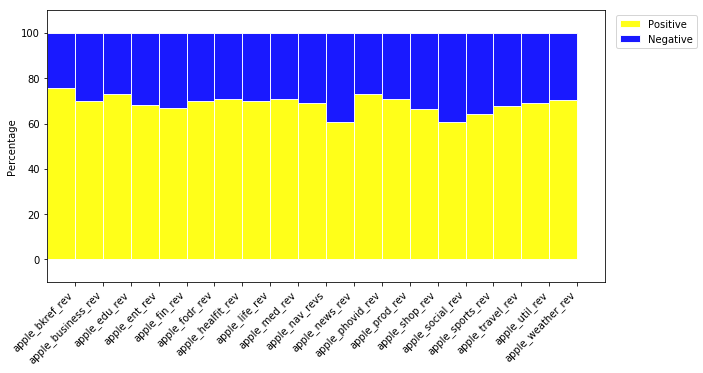

In [18]:
## percentage stack bar chart- sentiment analysis- pos vs. neg
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))
# Set bar width at 1
bar_width = 1
# positions of the left bar-boundaries
bar_l = [i for i in range(len(df['Positive']))] 
# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 
# Create the total score for each category
totals = [i+j for i,j in zip(df['Positive'], df['Negative'])]
# Create the percentage of the total score the pre_score value for each participant was
pos_rel = [i / j * 100 for  i,j in zip(df['Positive'], totals)]
# Create the percentage of the total score the mid_score value for each participant was
neg_rel = [i / j * 100 for  i,j in zip(df['Negative'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       pos_rel, 
       # labeled 
#        label='pos', 
       # with alpha
       alpha=0.9, 
       # with color
       color='yellow',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white',
       label= 'Positive'
       )
# Create a bar chart in position bar_1
ax.bar(bar_l, 
       neg_rel, 
       bottom=pos_rel, 
       # labeled 
#        label='neg', 
       # with alpha
       alpha=0.9, 
       # with color
       color='blue', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white',
       label = 'Negative'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, df['Category'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")
# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)
# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
# shot plot
plt.show()

### Simple sentiment analysis using NRC data

In [21]:
def get_nrc_data():
    nrc = nrc = "/Users/siqi/Desktop/Data_Analytics/lecture/data2/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [22]:
emotion_dict = get_nrc_data()

In [25]:
def emotion_analyzer(text,emotion_dict=emotion_dict):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

In [26]:
def comparative_emotion_analyzer(text_tuples,object_name="Category",print_output=False):
    if print_output:
        print("%-20s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(object_name,
                                                              "fear","trust","negative","positive",
                                                              "joy","disgust","anticip", "sadness",
                                                              "surprise"))
    import pandas as pd
    df = pd.DataFrame(columns=[object_name,'Fear','Trust','Negative',
                           'Positive','Joy','Disgust','Anticipation',
                           'Sadness','Surprise'],)
    df.set_index(object_name,inplace=True)
    
    output = df    
    for text_tuple in text_tuples:
        text = text_tuple[1] 
        result = emotion_analyzer(text)  
        if print_output:
            print("%-20s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
                text_tuple[1][0:20],result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']))
        df.loc[text_tuple[0]] = [result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']]
    return output

In [ ]:
comparative_emotion_analyzer([('apple_bkref_rev',apple_bkref_rev_str),('apple_business_rev', apple_business_rev_str),('apple_edu_rev',apple_edu_rev_str),
                              ("apple_ent_rev",apple_ent_rev_str),("apple_fin_rev",apple_fin_rev_str),("apple_fodr_rev",apple_fodr_rev_str),
                               ('apple_healfit_rev',apple_healfit_rev_str),("apple_life_rev",apple_life_rev_str),
                               ("apple_med_rev",apple_med_rev_str),("apple_nav_revs",apple_nav_revs_str),("apple_news_rev",apple_news_rev_str),
                               ("apple_phovid_rev",apple_phovid_rev_str),("apple_prod_rev",apple_prod_rev_str),
                               ("apple_shop_rev",apple_shop_rev_str),("apple_social_rev",apple_social_rev_str),
                               ("apple_sports_rev",apple_sports_rev_str),("apple_travel_rev",apple_travel_rev_str),
                               ("apple_util_rev",apple_util_rev_str ),("apple_weather_rev",apple_weather_rev_str)
                              ])

In [ ]:
def vader_comparison(reviews):
    from nltk import sent_tokenize
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    import pandas as pd
    headers = ['pos','neg','neu','compound']
    analyzer = SentimentIntensityAnalyzer()
    result = list()
    
    for i in range(len(reviews)):
        name = reviews[i][0]
        sentences = sent_tokenize(reviews[i][1])
        pos=compound=neu=neg=0
        for sentence in sentences:
            vs = analyzer.polarity_scores(sentence)
            pos+=vs['pos']/(len(sentences))
            compound+=vs['compound']/(len(sentences))
            neu+=vs['neu']/(len(sentences))
            neg+=vs['neg']/(len(sentences))
        result.append([name, pos, neg, neu, compound])
        
    df_v = pd.DataFrame(result, columns = ['name','pos','neg','neu','compound'])
    df_v.set_index('name', inplace = True)
    df_v.sort_values(by = 'compound', ascending = False, inplace = True)
    
    return df_v

In [ ]:
df_a_v = vader_comparison(name_review)
df_a_v